<a href="https://colab.research.google.com/github/sherjahong1r/Machine-Learning-Lessons/blob/main/02_simple_linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Machine Learning**


# **Simple linear Regression**

In [27]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/anvarnarz/praktikum_datasets/main/housing_LR.csv', index_col=0)
df.head(10)

,district,rooms,size,level,max_levels,price
0,Юнусабадский,3,57.0,4,4,52000.0
1,Яккасарайский,2,52.0,4,5,56000.0
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0
7,Яккасарайский,2,32.0,5,5,20000.0
8,Учтепинский,2,51.0,3,4,26200.0
9,Чиланзарский,1,30.0,1,4,22200.0


In [28]:
df.shape

(7278, 6)

# Ustunlar ta'rifi
- `location` - sotilayotgan uy manzili
- `district` - uy joylashgan tuman
- `rooms` - xonalar soni
- `size` - uy maydoni (kv.m)
- `level` - uy

In [29]:
df['district'].value_counts()

,count
district,
Чиланзарский,1616
Мирзо-Улугбекский,1342
Учтепинский,872
Юнусабадский,847
Мирабадский,717
Яккасарайский,628
Яшнободский,456
Шайхантахурский,356
Олмазорский,262


In [30]:
housing = df[df.district=='Чиланзарский']
housing.head()

,district,rooms,size,level,max_levels,price
2,Чиланзарский,2,42.0,4,4,37000.0
3,Чиланзарский,3,65.0,1,4,49500.0
4,Чиланзарский,3,70.0,3,5,55000.0
5,Чиланзарский,1,28.0,1,4,25500.0
6,Чиланзарский,1,30.0,2,4,21200.0


In [31]:
housing.shape

(1616, 6)

In [32]:
X = housing['size']
X

,size
2,42.0
3,65.0
4,70.0
5,28.0
6,30.0
...,...
7404,70.0
7422,20.0
7433,32.0
7445,70.0


In [33]:
y = housing['price']
y

,price
2,37000.0
3,49500.0
4,55000.0
5,25500.0
6,21200.0
...,...
7404,48000.0
7422,18500.0
7433,28000.0
7445,49800.0


In [34]:
X = housing['size'].to_numpy()
X

array([42., 65., 70., ..., 32., 70., 30.])

In [35]:
y = housing['price'].to_numpy()
y

array([37000., 49500., 55000., ..., 28000., 49800., 22914.])


Narx va uy maydoni o'rtasida chiziqli bog'liqlik bor ekanini tekshirib ko'ramiz.

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

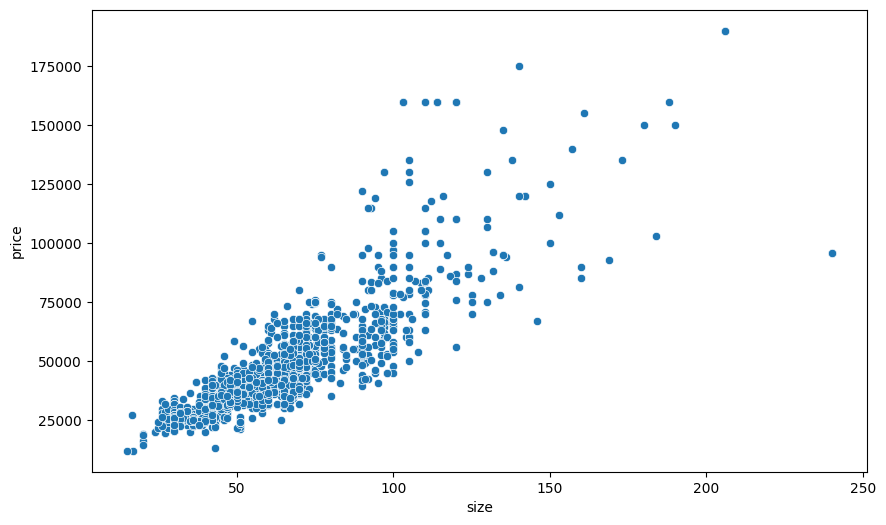

In [37]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=housing, x='size', y='price')
plt.show()

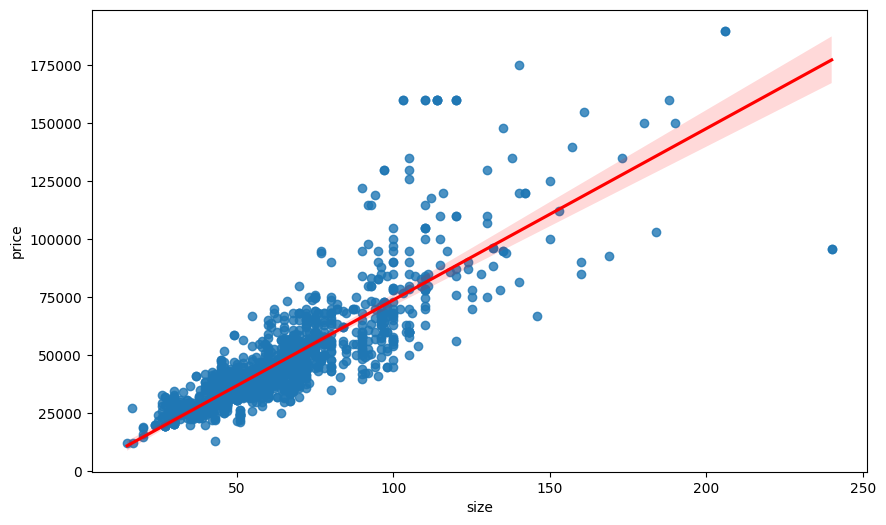

In [38]:
plt.figure(figsize=(10,6))
sns.regplot(data=housing, x='size', y='price', line_kws={"color": "red"})
plt.show()

## 1-Vazifa

Sizning vazifangiz yuqoridagi X va y o'zgaruvchilardan quyidagi formuladan foydalangan xolda  θ0  va  θ1  koeffisientlarni hisoblash.

![Imgur](https://i.imgur.com/zZoXZxI.png)

Bu yerda  x~  - X ustun uchun o'rtracha qiymat,  y~  - y ustun uchun o'rtracha qiymat

In [39]:
import numpy as np

Xmean = np.mean(X)
ymean = np.mean(y)

In [40]:
theta1 = sum((X-Xmean)*(y-ymean))/sum((X-Xmean)**2)
print(f"{theta1=}")

theta1=np.float64(740.0264822713287)


In [41]:
theta0 = ymean - theta1*Xmean
print(f"{theta0=}")

theta0=np.float64(-195.94911352690542)


## 2-Vazifa
`X` dan bir nechta tasodifiy qiymatlarni ajratib oling va ularga mos keluvchi `y` ni yuqoridagi koeffisientlar yordamida hisoblab ko'ring.

![Imgur](https://i.imgur.com/iT5tffj.png)

In [42]:
x_test = housing.sample(10, random_state=42)['size'].to_numpy()
print(f"{x_test=}")  # bundagi array qiymatlar maydoni
y_test = housing.sample(10, random_state=42)['price'].to_numpy()
print(f"{y_test=}")  # bundagi array qiymatlar narxi

x_test=array([54., 42., 36., 60., 48., 68., 38., 65., 52., 44.])
y_test=array([37500., 26500., 25500., 39000., 32500., 34500., 22700., 47000.,
       37900., 36000.])


In [43]:
y_predict = theta0 + theta1*x_test
print(f"{y_predict=}")

y_predict=array([39765.48092912, 30885.16314187, 26445.00424824, 44205.63982275,
       35325.3220355 , 50125.85168092, 27925.05721278, 47905.77223411,
       38285.42796458, 32365.21610641])


## 3-Vazifa

Hisoblangan va asl qiymtlar o'rtasidagi RMSE (root mean square error), MAE (mean absolute error) hisoblang.

![Imgur](https://i.imgur.com/GJH9CGy.png)

![Imgur](https://i.imgur.com/aXL9iWa.png)

In [44]:
MAE = np.sum(np.absolute(y_predict-y_test))/len(y_test)
print(f"{MAE=}")

MAE=np.float64(4140.35031634715)


In [45]:
RMSE = np.sqrt(np.sum((y_predict-y_test)**2)/len(y_test))
print(f"{RMSE=}")

RMSE=np.float64(5882.051673173715)


## Yuqorida formula yordamida bajarildi

# **NEW SECTION**

# **Scikit-learn yordamida LR**

## Yuqoridagi ammalarni Scikit-learn yordamida bajarish

In [46]:
housing.shape

(1616, 6)

## Ma'lumotlar kam bo'lgani uchun 10 % test uchun ajratildi

In [47]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.10, random_state=42)

# from sklearn.model_selection import train_test_split: Bu qator scikit-learn kutubxonasidan train_test_split funksiyasini import qiladi.
# train_set, test_set = train_test_split(housing, test_size=0.10, random_state=42): Bu qator housing ma'lumotlaringizni ikki qismga ajratadi:
# train_set: Ma'lumotlarning 90% (o'qitish uchun).
# test_set: Ma'lumotlarning 10% (modelni baholash uchun).
# random_state=42: Bu parametr bo'lish jarayonini takrorlanuvchan qiladi, ya'ni har safar bir xil natija beradi.

Linear Regression ML

In [50]:
from sklearn import linear_model
LR_model = linear_model.LinearRegression()

x_train = np.asanyarray(train_set[['size']])
y_train = np.asanyarray(train_set[['price']])

# Modelni tarbiyalaymiz (train)
LR_model.fit(x_train, y_train)

# theta1 va theta0 koeefisentlarini ajratib olamiz
theta1 = LR_model.coef_[0][0]
theta0 = LR_model.intercept_[0]
print(f"{theta1=}")
print(f"{theta0=}")

# from sklearn import linear_model: linear_model modulini sklearn kutubxonasidan import qiladi.
# LR_model = linear_model.LinearRegression(): Chiziqli regressiya modelini yaratadi.
# x_train = np.asanyarray(train_set[['size']]) va y_train = np.asanyarray(train_set[['price']]): Mashg'ulot
# ma'lumotlaridan ('size' va 'price' ustunlari) kirish (x_train) va chiqish (y_train) massivlarini tayyorlaydi.
# LR_model.fit(x_train, y_train): Modelni x_train va y_train ma'lumotlari asosida o'qitadi (tarbiyalaydi).
# theta1 = LR_model.coef_[0][0] va theta0 = LR_model.intercept_[0]: O'qitilgan
# modeldan theta1 (egri chiziqning qiyaligi) va theta0 (kesishish nuqtasi) koeffitsientlarini oladi.
# print(f"{theta1=}") va print(f"{theta0=}"): Hisoblangan koeffitsientlarni ekranga chiqaradi.


theta1=np.float64(732.7784051414766)
theta0=np.float64(106.31843170110369)


$\theta_0$ va $\theta_1$ qiymatlari yordamida to'g'ri chiziq chizamiz

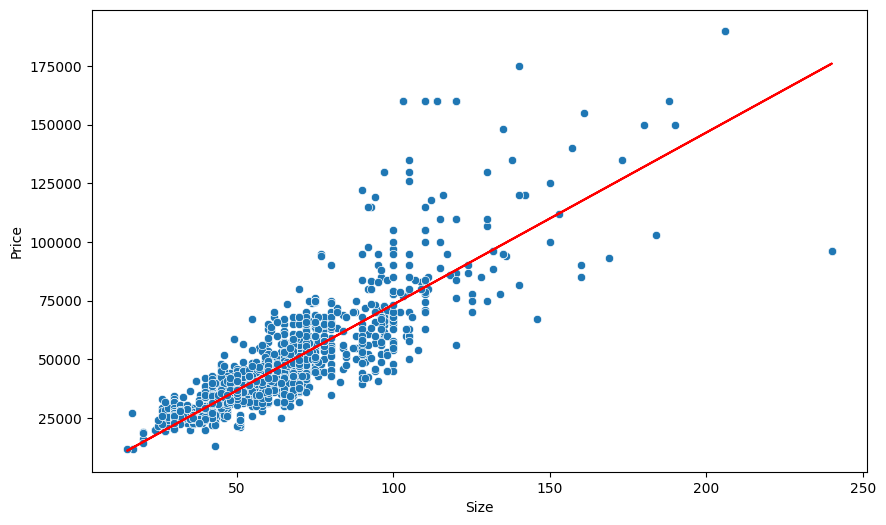

In [57]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=housing, x='size', y='price')
plt.plot(x_train, theta1*x_train + theta0, '-r')
# x_train (uy maydoni) va model bashorat qilgan narxlar (theta1*x_train + theta0)
# orasidagi chiziqli bog'liqlikni qizil rangdagi chiziq shaklida grafikda chizadi.
plt.xlabel("Size")
plt.ylabel("Price")
plt.show()

## Modelni baholaymiz

In [58]:
x_test = np.asanyarray(test_set[['size']])
# test_set dan 'size' ustunini olib, uni NumPy array'ga o'giradi va x_test ga saqlaydi. Bu modelning bashoratlari uchun kiritma ma'lumot hisoblanadi.
y_test = np.asanyarray(test_set[['price']])
# test_set dan 'price' ustunini olib, uni NumPy array'ga o'giradi va y_test ga saqlaydi. Bu modelning bashoratlarini solishtirish uchun haqiqiy narxlar hisoblanadi.

# np.asanyarray - bu NumPy kutubxonasidagi funksiya bo'lib, u kiritilgan ma'lumotni array (massiv) ga aylantiradi.

In [59]:
y_predict = LR_model.predict(x_test)

In [60]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

MAE = mean_absolute_error(y_test, y_predict)
RMSE = np.sqrt(mean_squared_error(y_test, y_predict))
print(f"{MAE=}")
print(f"{RMSE=}")

MAE=7269.709648262382
RMSE=np.float64(12734.803748258666)
